# Análise Exploratória de Dados - Lending Club

O objetivo deste notebook é realizar uma análise exploratória de dados, utilizando o *dataset* da Lending Club, uma empresa americana de serviços financeiros, especializada na concessão de empréstimos "peer-to-peer" (P2P), ou seja, uma pessoa pode pegar dinheiro emprestado com outra, sem a intermediação de um banco. 

Os dados foram disponibilizados pela própria empresa, entre os anos de 2007 e 2018. No entanto, esses dados não são mais divulgados pela Lending Club. Contudo, o *dataset* referente aos anos anteriores pode ser baixado no Kaggle, através do seguinte [link](https://www.kaggle.com/datasets/wordsforthewise/lending-club).

<br>

![](img/how-does-P2P-lending-work.jpg)


In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
accepted_all = pd.read_csv('./data/accepted_2007_to_2018Q4.csv', nrows=1000)

accepted_all = accepted_all.dropna(axis=1, thresh=len(accepted_all)*0.5)

accepted_all.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 107 columns):
 #    Column                      Non-Null Count  Dtype  
---   ------                      --------------  -----  
 0    id                          1000 non-null   int64  
 1    loan_amnt                   1000 non-null   float64
 2    funded_amnt                 1000 non-null   float64
 3    funded_amnt_inv             1000 non-null   float64
 4    term                        1000 non-null   object 
 5    int_rate                    1000 non-null   float64
 6    installment                 1000 non-null   float64
 7    grade                       1000 non-null   object 
 8    sub_grade                   1000 non-null   object 
 9    emp_title                   957 non-null    object 
 10   emp_length                  958 non-null    object 
 11   home_ownership              1000 non-null   object 
 12   annual_inc                  1000 non-null   float64
 13   verification_stat

In [41]:
lc_dict = pd.read_excel('data/LCDataDictionary.xlsx')

col_names = lc_dict['LoanStatNew'].values

col_names

array(['loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies'],
      dtype=object)

In [42]:
accepted = pd.read_csv('data/accepted_2007_to_2018Q4.csv', usecols=col_names)

accepted.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,...,Aug-2003,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,0.0
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,...,Dec-1999,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,...,Aug-2000,6.0,0.0,7869.0,56.2,18.0,w,Joint App,5.0,0.0
3,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,...,Sep-2008,13.0,0.0,7802.0,11.6,17.0,w,Individual,1.0,0.0
4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,...,Jun-1998,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,0.0
5,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,...,Oct-1987,5.0,0.0,8822.0,68.4,6.0,w,Individual,0.0,0.0
6,20000.0,36 months,9.17,637.58,B,B2,Vice President of Recruiting Operations,10+ years,MORTGAGE,180000.0,...,Jun-1990,12.0,0.0,87329.0,84.5,27.0,f,Individual,4.0,0.0
7,20000.0,36 months,8.49,631.26,B,B1,road driver,10+ years,MORTGAGE,85000.0,...,Feb-1999,8.0,0.0,826.0,5.7,15.0,w,Individual,3.0,0.0
8,10000.0,36 months,6.49,306.45,A,A2,SERVICE MANAGER,6 years,RENT,85000.0,...,Apr-2002,14.0,1.0,10464.0,34.5,23.0,w,Individual,1.0,1.0
9,8000.0,36 months,11.48,263.74,B,B5,Vendor liaison,10+ years,MORTGAGE,42000.0,...,Nov-1994,8.0,0.0,7034.0,39.1,18.0,w,Individual,1.0,0.0


In [43]:
accepted['term'].value_counts()

 36 months    1609754
 60 months     650914
Name: term, dtype: int64

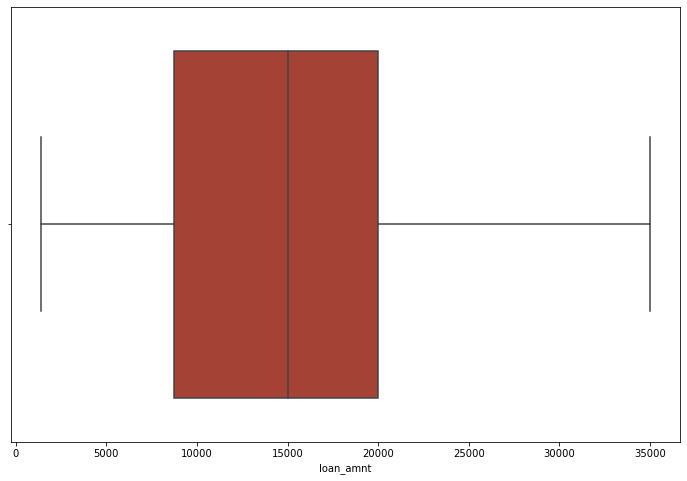

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(data = accepted, x = 'loan_amnt', color='#B83323');

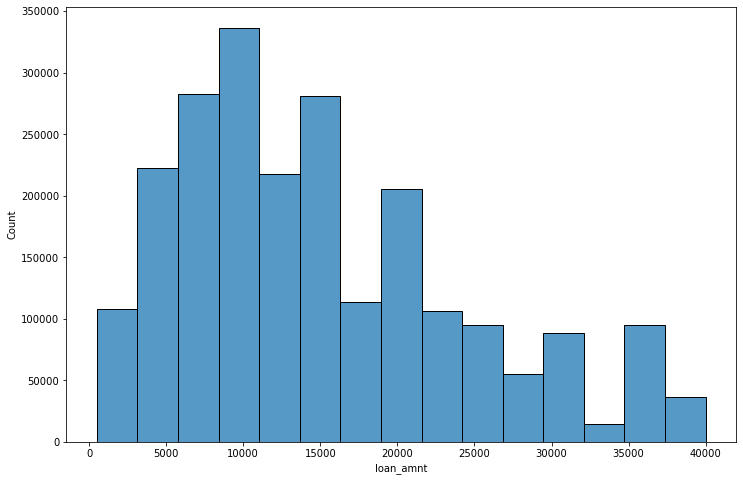

In [44]:
plt.figure(figsize=(12,8))
sns.histplot(data = accepted, x = 'loan_amnt', bins = 15);